# Prediction of demand for shared bikes

## Problem Statement

Build a multiple linear regression model for the prediction of demand for shared bikes


In [1]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data set

df = pd.read_csv('./day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# df[df['weathersit'] == 4]

In [5]:
# check shape of the data set
df.shape


(730, 16)

In [6]:
#data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Analysis

In [7]:
# Check null values in the data set
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# all columns do have valid values

In [9]:
# check details of numeric values in the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#Check unique values in each column
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
# remove duplicate records

df.drop_duplicates(inplace=True)

### Removing columns not relevant to the analysis

####  columns casual,registered,instant not relevant as cnt is sum of casual,registered, no need to keep reduntant information in dataset

In [12]:
df.drop(columns=['instant', 'casual', 'registered', 'dteday'], inplace=True)

### Mapping columns to categorical values 

#### columns yr, mnth, weekday, weathersit, season to categorical values

In [13]:
#Mapping lookup for columns


map_year =  {
        0: 2018,
        1 : 2019
    }


map_mnth = {
        1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
        5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
        9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    }


#sequence of Weekdays changed based on the data in dataset
map_weekday = {1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tue'}


map_season =  {
        1: 'Spring', 
        2: 'Summer', 
        3: 'Fall', 
        4: 'Winter'
    }

map_weather =  {
        1: 'Clear',
        2: 'Cloudy/Mist',
        3: 'Snow/Rain',
        4: 'Severe'
    }





In [14]:

df['season'] = df.season.map(map_season)
df['mnth'] = df.mnth.map(map_mnth)
df['weekday'] = df.weekday.map(map_weekday)
df['weathersit'] = df.weathersit.map(map_weather)
df['yr'] = df.yr.map(map_year)



In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,0,Mon,0,Cloudy/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,0,Tue,0,Cloudy/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#column types changed in the latest dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [17]:
#capture numeric dtype columns and object dtype column type

num_dtypes_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_dtypes_cols

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [18]:
#categorical columns
cat_dtypes_cols = df.select_dtypes(include=[np.object_]).columns.tolist()
cat_dtypes_cols

['season', 'mnth', 'weekday', 'weathersit']

## Univeriate Analysis

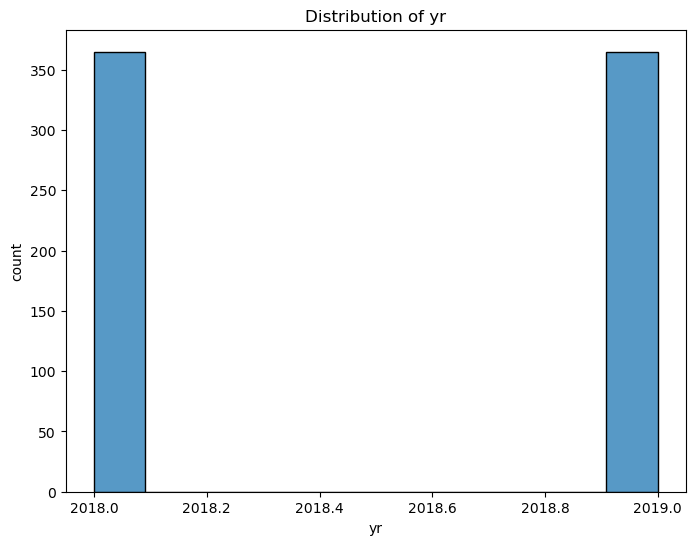

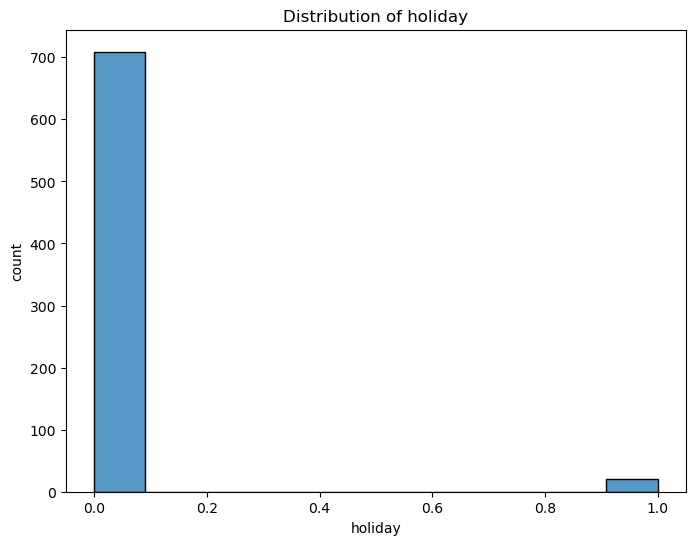

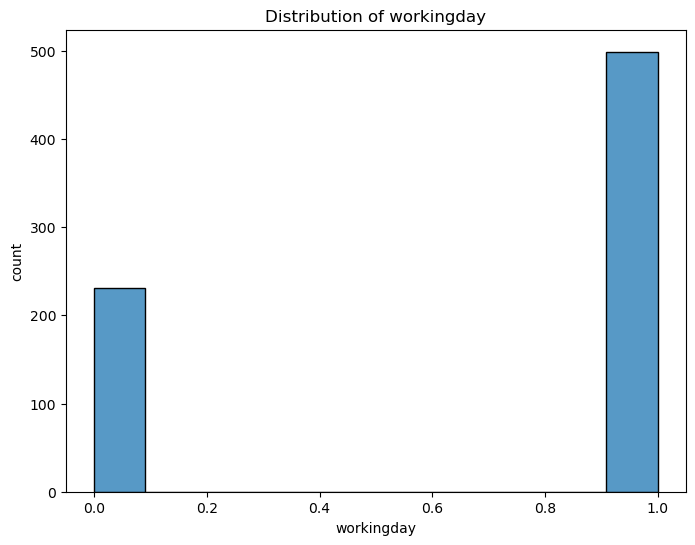

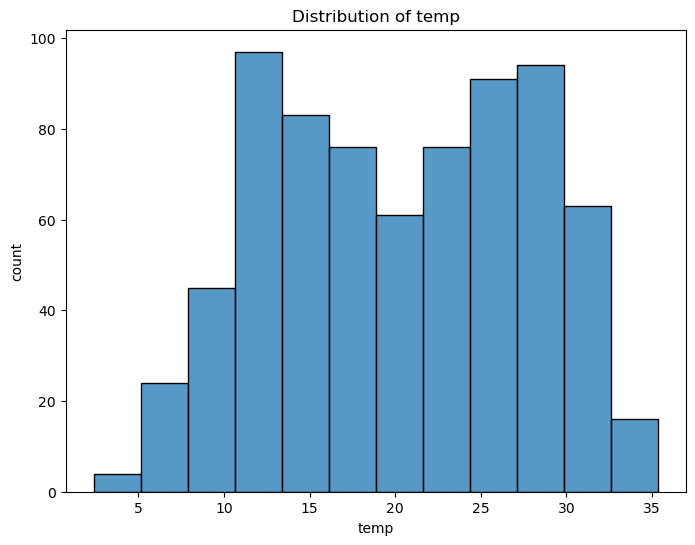

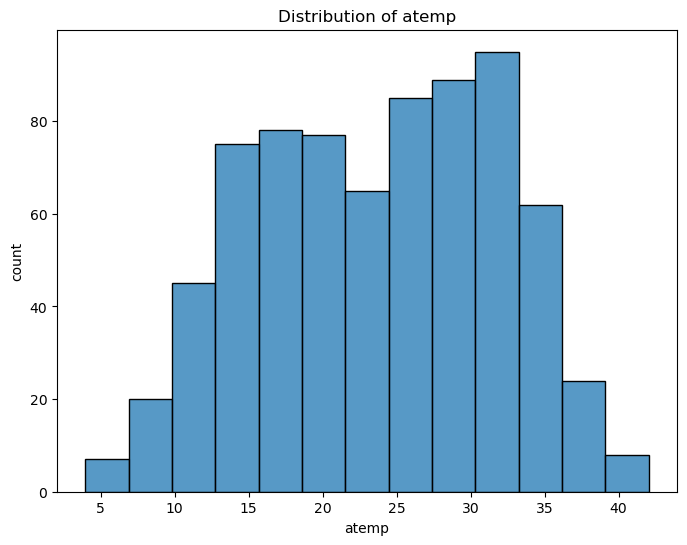

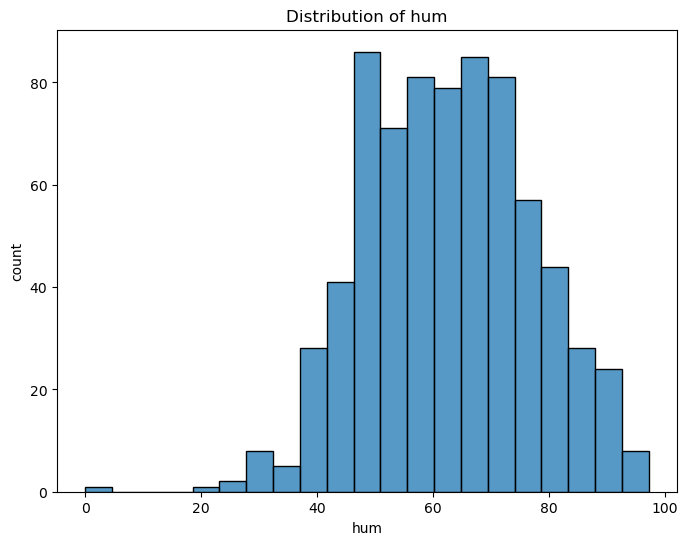

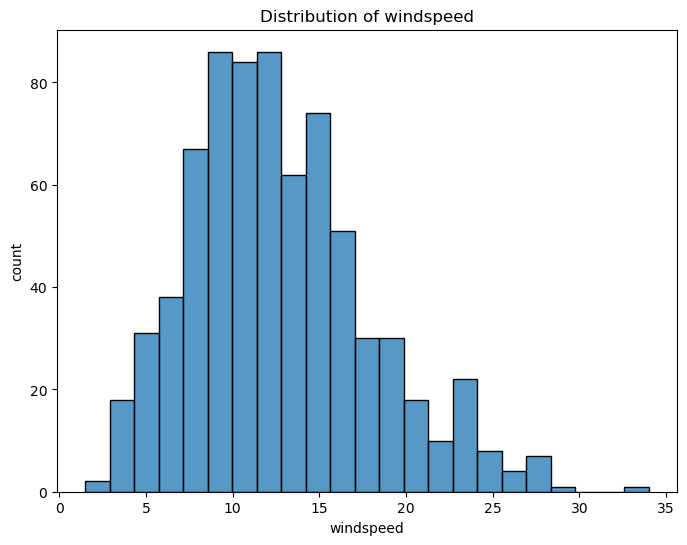

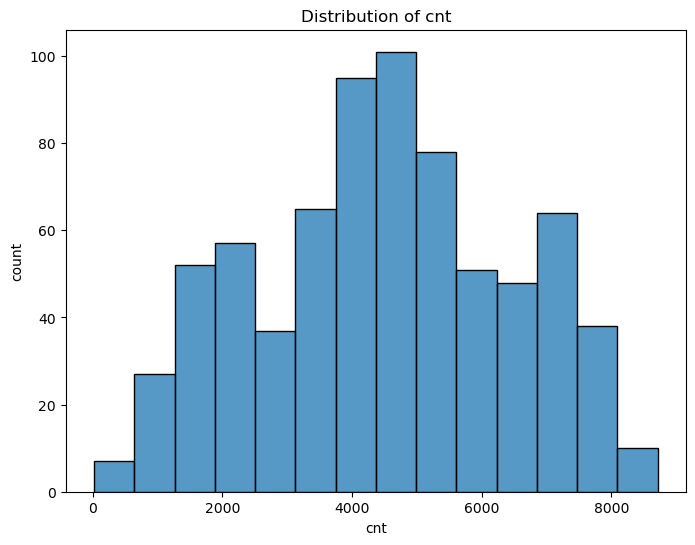

In [19]:
#Analyse all numerical columns with histoigram chart
def draw_hist_plot(data, column):
    plt.figure(figsize=(8, 6))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('count')
    sns.histplot(x=column, data=data)


for col in num_dtypes_cols:
    draw_hist_plot(df, col)
    


#### Observations : 
       1. holiday and working day columns does not pocess the much variance of data
       2. temp, atemp, hum, windspeed, cnt some what showing normal distribution also temp, atemp, hum, windspeed 

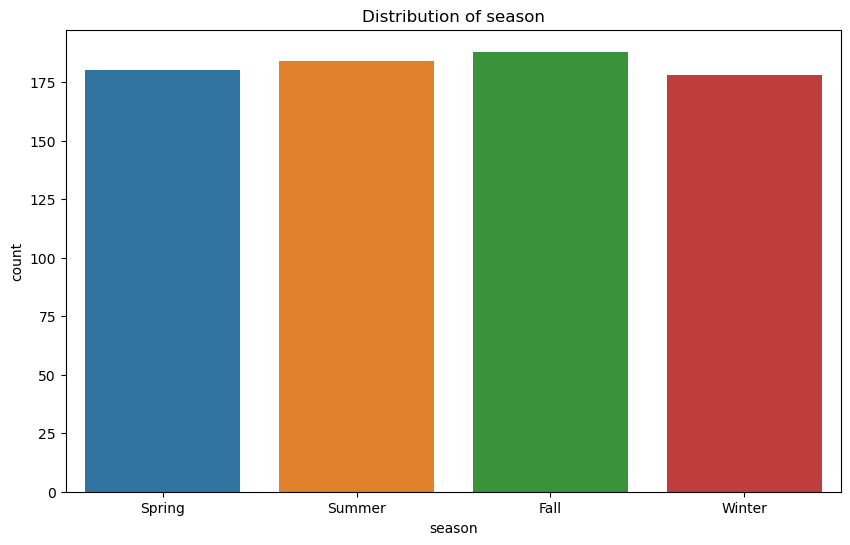

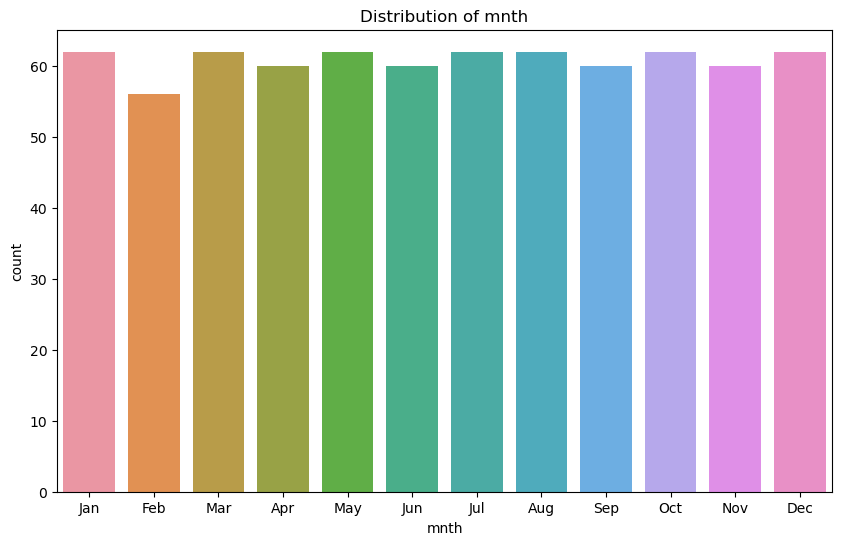

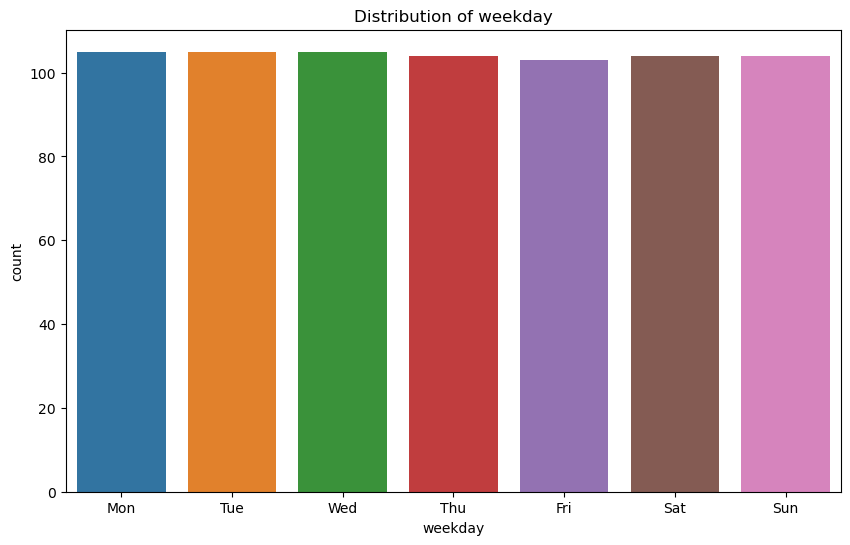

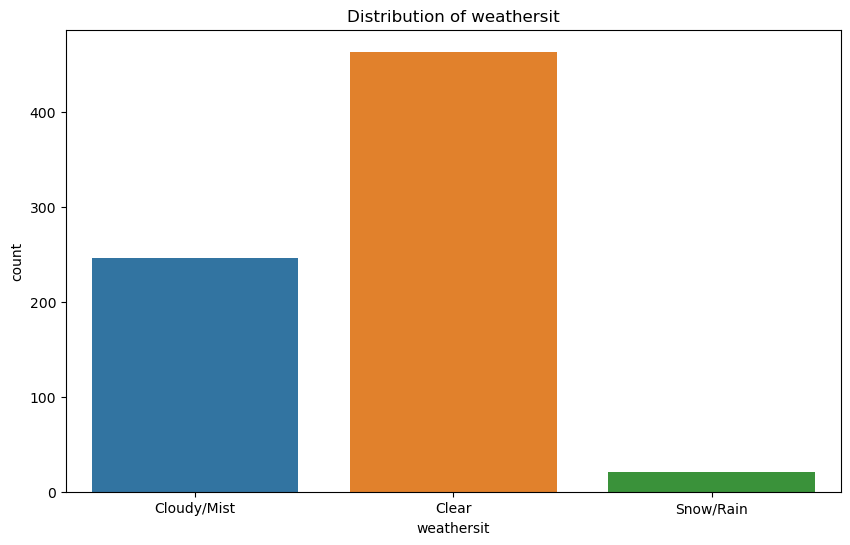

In [20]:
# Analyse categorical columns with boxplot
def draw_box_plot(data, column):
    plt.figure(figsize=(10, 6))
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('count')
    sns.countplot(x=column, data=data)
    
for col in cat_dtypes_cols:
    draw_box_plot(df, col)


### Observations:
    1. the demand is more during the 'Fall' but average count is more than 170 in all seasons
    2. the demand is almost same in every month with very little variance
    3. The demand is more on Clear weather and , during the Snow/Rainy wheather the demand drop significantly

## Bivariate Analysis

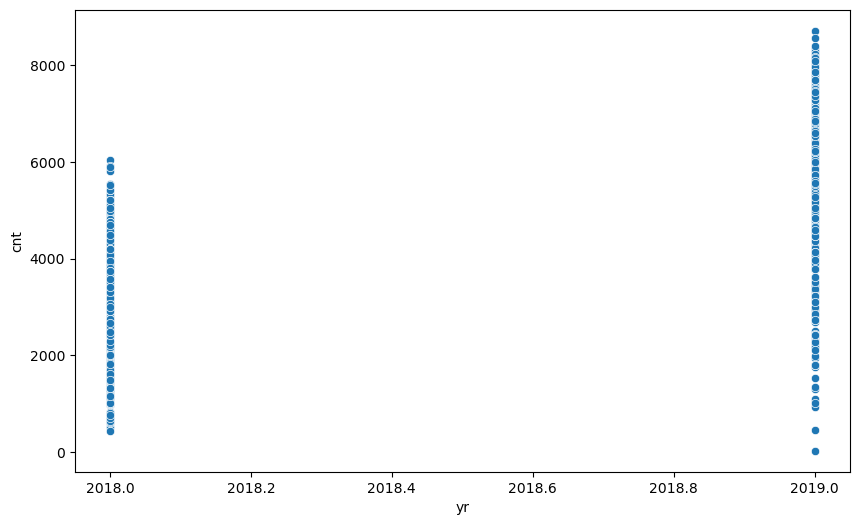

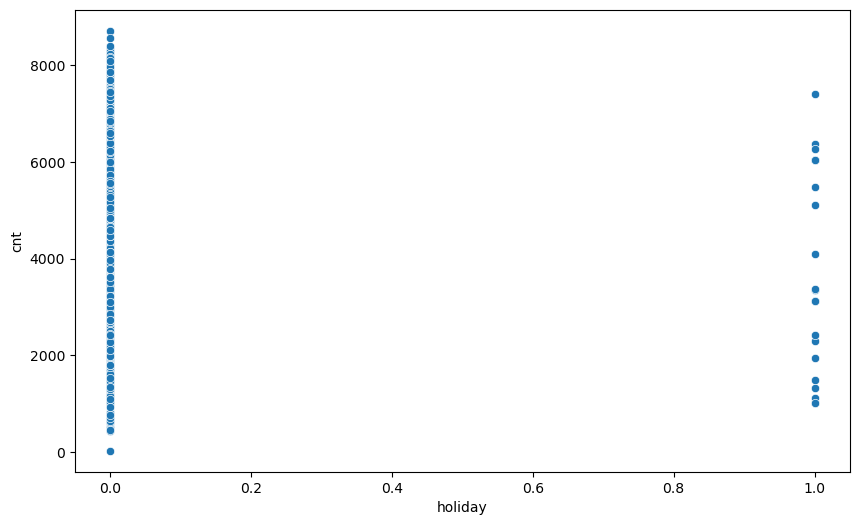

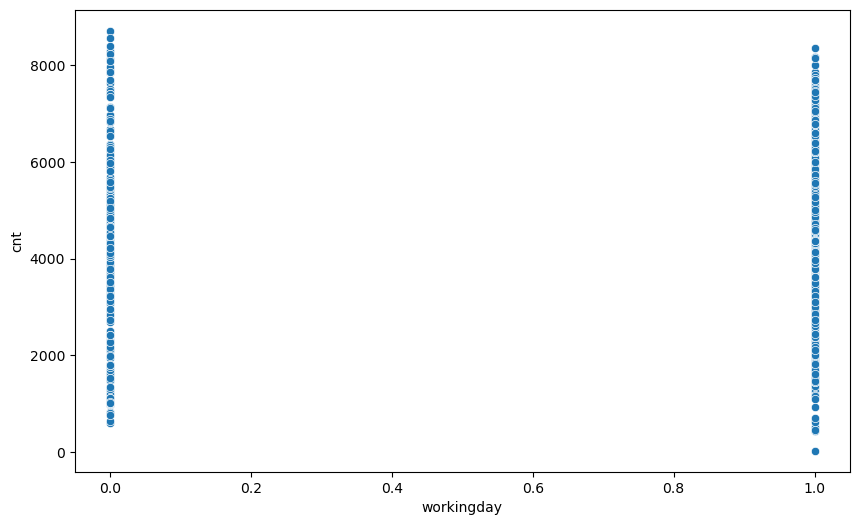

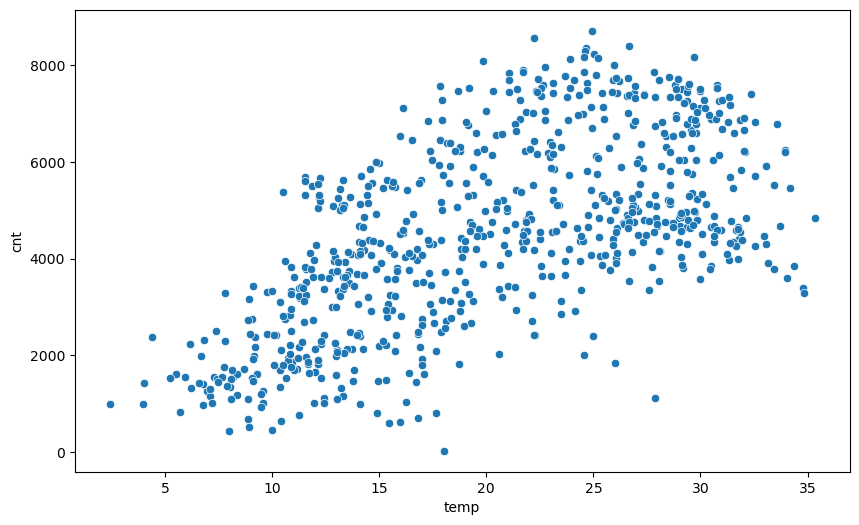

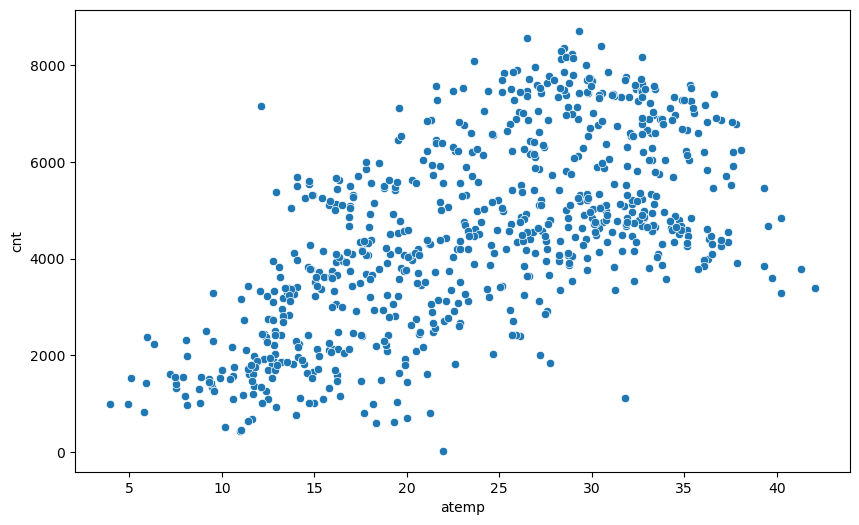

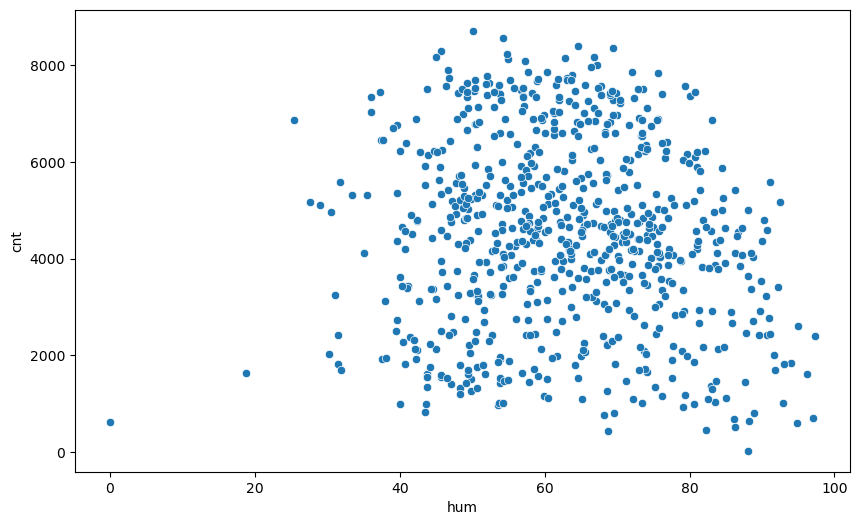

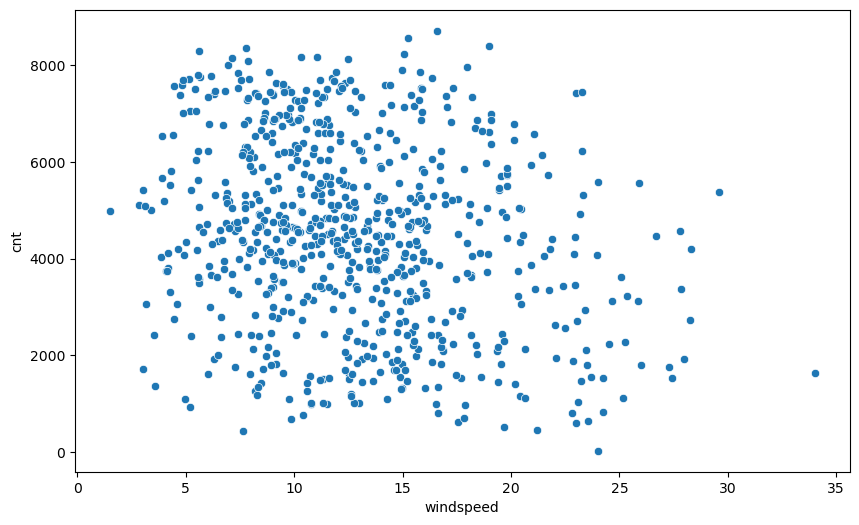

In [21]:
#analyse the numerica data type columns against 'cnt' using scatter plot

def draw_scatter_plot(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y)
    

for elem in num_dtypes_cols:
    if elem == 'cnt':
        continue
    
    draw_scatter_plot(df, elem, 'cnt')


### Observation :
    1. holiday and workingday is not showing any correlation with cnt
    2. temp and atemp is showing positive correlation with cnt
    3. hum and windspeed showing negative correlation

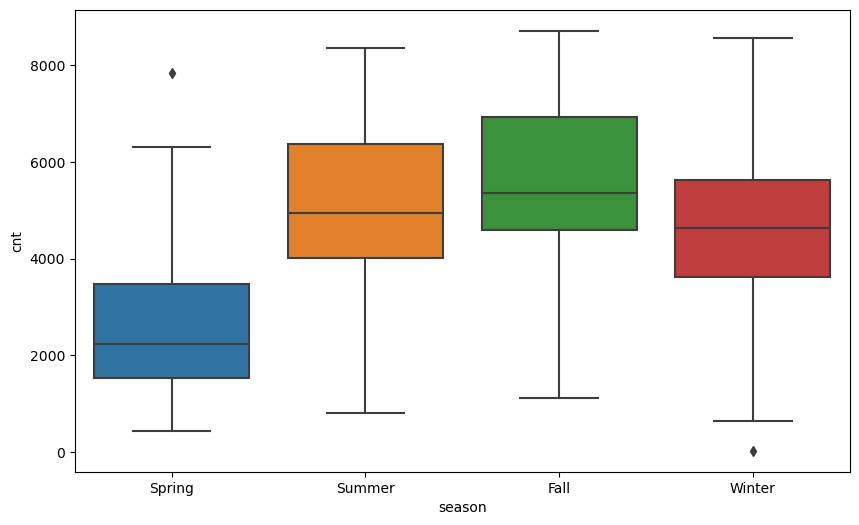

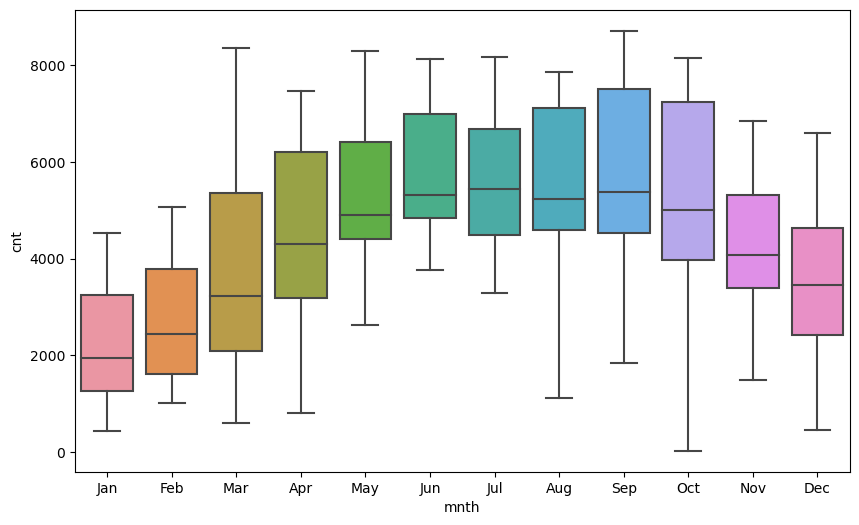

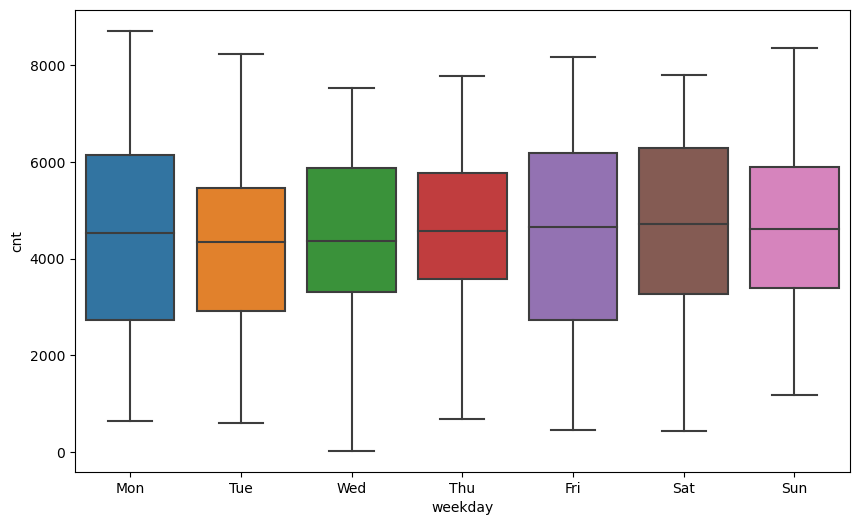

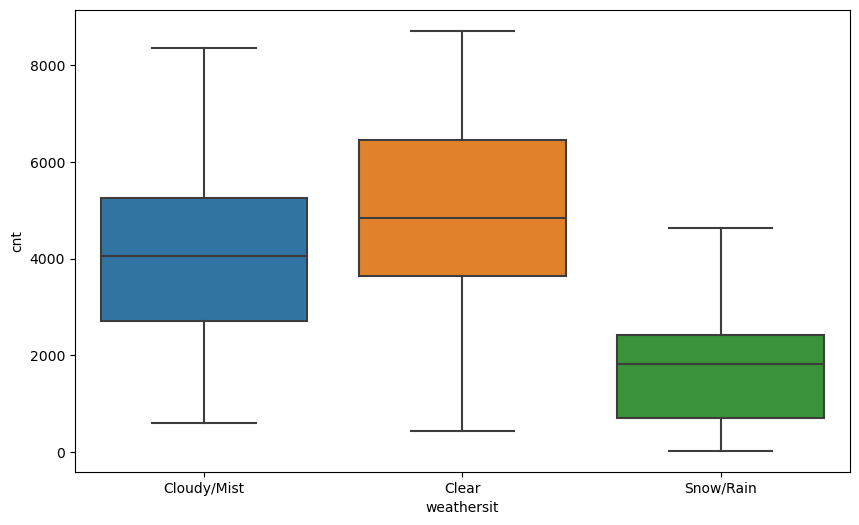

In [22]:
#analys categorical columns against cnt using box plot

def draw_box_plot(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x, y=y)
    
for col in cat_dtypes_cols:
    draw_box_plot(data=df, x=col, y='cnt')

### observation:
    1. demand is much less in sprint season, Fall season showing more count
    2. demand increased in 2019 over 2018
    3. month also showing an increasin trend from jan to jun and decreasing trend from oct to dec, season also may be affecting this  trend
    
    4. demand increased in pleasant wheather conditions

## Mutivariate analysis

In [23]:
# correlation between multiple columns are analysed based correlation matrix and heatmap

<Axes: >

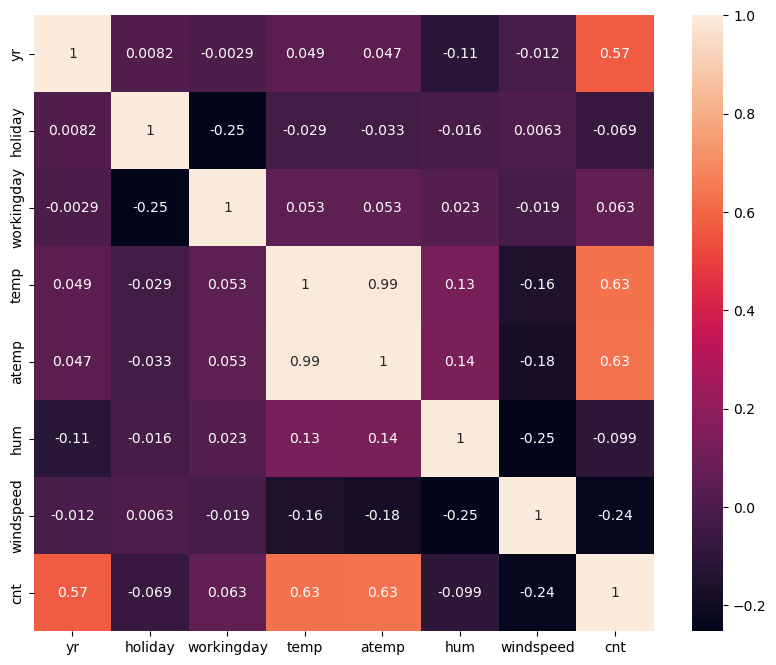

In [24]:
corr_matrx = df[num_dtypes_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrx, annot=True)

### Observation:
    1. temp and atemp columns are showing string correlation with cnt
    2. temp and atemp is also showing strong correlation (it will be handled in later stages using VIF)

## Feature Engineering

In [25]:
## Derive new dummy variables for categorical columns that have value count > 2


# for elem in dummy_val_cols:
df_col_val = pd.get_dummies(df[cat_dtypes_cols], columns=cat_dtypes_cols, drop_first=True, dtype=int)
df_col_val.head()

df[cat_dtypes_cols].nunique()


season         4
mnth          12
weekday        7
weathersit     3
dtype: int64

####  concating the new dummy column dataset to original dataset

In [26]:

df_dmy = pd.concat([df, df_col_val], axis=1)
df_dmy.shape

(730, 34)

In [27]:
#removing the categorical columsn , for which the dummy columns are created

df_dmy.drop(columns=cat_dtypes_cols, inplace=True)

### split the data set to dependent variable and predictor variable set and also split the  train and test sets and do scaling on the train set and build model using the scaled dataset

In [28]:
#import sklearn lib for traintest split , LinearRegression

from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [29]:
#extract dependent variable
# y = df_dmy.pop('cnt')

In [30]:
#creating train and test dataset 
df_train, df_test = train_test_split(df_dmy, test_size=.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

df_train.head()

(219, 30)
(511, 30)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy/Mist,weathersit_Snow/Rain
519,2019,0,1,24.497500,28.91415,48.7083,19.083811,6998,0,1,...,0,0,0,0,0,0,0,1,0,0
517,2019,0,0,23.916653,28.31440,54.9167,12.499654,8120,0,1,...,0,0,1,0,0,0,0,0,0,0
132,2018,0,1,21.012500,24.71500,86.3333,12.041575,4105,0,1,...,0,0,0,0,1,0,0,0,1,0
26,2018,0,1,7.995000,10.98500,68.7500,7.627079,431,1,0,...,0,0,0,1,0,0,0,0,0,0
291,2018,0,1,22.211299,25.69240,89.5217,16.303713,2424,0,0,...,1,0,0,0,0,0,0,0,0,1


In [31]:
#Normalise numeric columns using MinMaxScaler, this step will convert all numeric column values to a range 0-1



scaler = MinMaxScaler()

df_train[num_dtypes_cols] = scaler.fit_transform(df_train[num_dtypes_cols])
df_test[num_dtypes_cols] = scaler.transform(df_test[num_dtypes_cols])

df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Cloudy/Mist,weathersit_Snow/Rain
519,1.0,0.0,1.0,0.669039,0.687601,0.518413,0.518178,0.828017,0,1,...,0,0,0,0,0,0,0,1,0,0
517,1.0,0.0,0.0,0.648873,0.670296,0.584491,0.305497,0.969487,0,1,...,0,0,1,0,0,0,0,0,0,0
132,0.0,0.0,1.0,0.548043,0.566443,0.918865,0.290701,0.463245,0,1,...,0,0,0,0,1,0,0,0,1,0
26,0.0,0.0,1.0,0.096085,0.170293,0.731722,0.148104,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,0
291,0.0,0.0,1.0,0.589664,0.594644,0.952799,0.428376,0.251292,0,0,...,1,0,0,0,0,0,0,0,0,1


## Build Model

### Model generation is an iterative process fist genrate a model with all the features in the dataset and then use RFE approach to find the most relevant features and manually eliminate more features based on P-Value and VIF until best fit model is obtained

### Model 1

In [32]:
#build model with all features
#split predictor and dependent variable from train dataset
X_train = df_train.copy()
y_train = X_train.pop('cnt')


print(y_train.shape)
print(X_train.shape)



(219,)
(219, 29)


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 519 to 520
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    float64
 1   holiday                 219 non-null    float64
 2   workingday              219 non-null    float64
 3   temp                    219 non-null    float64
 4   atemp                   219 non-null    float64
 5   hum                     219 non-null    float64
 6   windspeed               219 non-null    float64
 7   season_Spring           219 non-null    int64  
 8   season_Summer           219 non-null    int64  
 9   season_Winter           219 non-null    int64  
 10  mnth_Aug                219 non-null    int64  
 11  mnth_Dec                219 non-null    int64  
 12  mnth_Feb                219 non-null    int64  
 13  mnth_Jan                219 non-null    int64  
 14  mnth_Jul                219 non-null    int64

In [34]:
# change the data set compactible for the model fit
y_train_sm = y_train.values.reshape(-1, 1)
X_train_sm = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train_sm, X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     45.77
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.21e-69
Time:                        21:43:58   Log-Likelihood:                 216.02
No. Observations:                 219   AIC:                            -374.0
Df Residuals:                     190   BIC:                            -275.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1885      0.062      3.030      0.003       0.066       0.311
yr                         0.2616      0.014     19.244      0.000       0.235       0.288
holiday                   -0.0463      0.044     -1.050      0.295      -0.133       0.041
workingday                 0.0889      0.022      4.106      0.000       0.046       0.132
temp                       0.4393      0.161      2.736      0.007       0.123       0.756
atemp                      0.0452      0.155      0.293      0.770      -0.260       0.350
hum                       -0.1763      0.059     -2.992      0.003      -0.293      -0.060
windspeed                 -0.1822      0.043     -4.222      0.000      -0.267      -0.097
season_Spring             -0.0150      0.053     -0.283      0.778      -0.120       0.090
season_Summer              0.0941      0.046      2.059      0.041       0.004       0.184
season_Winter              0.1563      0.056      2.778      0.006       0.045       0.267
mnth_Aug                   0.0224      0.061      0.368      0.713      -0.098       0.142
mnth_Dec                  -0.0309      0.059     -0.524      0.601      -0.147       0.085
mnth_Feb                  -0.0186      0.057     -0.329      0.743      -0.130       0.093
mnth_Jan                  -0.0379      0.058     -0.649      0.517      -0.153       0.077
mnth_Jul                   0.0325      0.061      0.536      0.593      -0.087       0.152
mnth_Jun                   0.0256      0.044      0.580      0.563      -0.062       0.113
mnth_Mar                   0.0166      0.042      0.396      0.693      -0.066       0.100
mnth_May                   0.0038      0.038      0.101      0.920      -0.070       0.078
mnth_Nov                  -0.0054      0.065     -0.083      0.934      -0.134       0.123
mnth_Oct                   0.0209      0.063      0.335      0.738      -0.103       0.144
mnth_Sep                   0.1414      0.057      2.490      0.014       0.029       0.253
weekday_Mon                0.0955      0.026      3.716      0.000       0.045       0.146
weekday_Sat               -0.0063      0.024     -0.261      0.794      -0.054       0.041
weekday_Sun                0.0350      0.025      1.422      0.157      -0.014       0.084
weekday_Thu               -0.0325      0.025     -1.288      0.199      -0.082       0.017
weekday_Tue                0.0504      0.027      1.902      0.059      -0.002       0.103
weekday_Wed               -0.0202      0.023     -0.868      0.386      -0.066       0.026
weathersit_Cloudy/Mist    -0.0604      0.017     -3.463      0.001      -0.095      -0.026
weathersit_Snow/Rain      -0.2053      0.041     -4.996      0.000      -0.286      -0.124
==============================================================================
O

### Observation  : Many of the predictor varaible do have p value more than .05 and appear to be not relevant to the model 

### Checking VIF of all features

#### VIF is the indicator  of multicolinearity in the data set

In [35]:
#function to get the vif of the dataframe columns
def vif_matrix(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                       for i in range(df.shape[1])]
    return vif_data



vif_matrix(X_train)
    

,feature,VIF
0,yr,1.075062
1,holiday,3.433607
2,workingday,100.039167
3,temp,39.350883
4,atemp,29.984641
5,hum,1.767344
6,windspeed,1.310267
7,season_Spring,12.486341
8,season_Summer,9.285401
9,season_Winter,13.373256


#### Observation  : Many columns showing VIF  > 5 and that means , those columns are linearly dependent on other columns and such columns will be eliminated for good fit model

### Model 2 (using RFE)

#### RFE is an automatic approach to feature selection method

In [36]:
#Initially will try with all features and reduce the features based on the 
lm_rfe = LinearRegression()
#selecting the half of the relevant features from the data set
rfe = RFE(estimator=lm_rfe, n_features_to_select = (int(X_train.shape[1]/2)))
rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Summer',
       'season_Winter', 'mnth_Feb', 'mnth_Jan', 'mnth_Sep', 'weekday_Sun',
       'weathersit_Cloudy/Mist', 'weathersit_Snow/Rain'],
      dtype='object')

### Reduce the number of features using manual approach , starting from the above selected features

##  Model -3

In [37]:
#drop columns other than selected in the Model-2

X_train = X_train[X_train.columns[rfe.support_]]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 519 to 520
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      219 non-null    float64
 1   holiday                 219 non-null    float64
 2   temp                    219 non-null    float64
 3   atemp                   219 non-null    float64
 4   hum                     219 non-null    float64
 5   windspeed               219 non-null    float64
 6   season_Summer           219 non-null    int64  
 7   season_Winter           219 non-null    int64  
 8   mnth_Feb                219 non-null    int64  
 9   mnth_Jan                219 non-null    int64  
 10  mnth_Sep                219 non-null    int64  
 11  weekday_Sun             219 non-null    int64  
 12  weathersit_Cloudy/Mist  219 non-null    int64  
 13  weathersit_Snow/Rain    219 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 25.7 KB

In [38]:
def build_model(X, y):
    X_train_sm = sm.add_constant(X)
    lm_sm = sm.OLS(y, X_train_sm).fit()

    return lm_sm

build_model(X_train, y_train_sm).summary()  



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     93.82
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.05e-80
Time:                        21:43:58   Log-Likelihood:                 211.59
No. Observations:                 219   AIC:                            -393.2
Df Residuals:                     204   BIC:                            -342.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2484      0.049      5.042      0.000       0.151       0.346
yr                         0.2610      0.013     19.767      0.000       0.235       0.287
holiday                   -0.1354      0.049     -2.747      0.007      -0.233      -0.038
temp                       0.4984      0.135      3.704      0.000       0.233       0.764
atemp                      0.0442      0.147      0.302      0.763      -0.245       0.333
hum                       -0.1897      0.055     -3.424      0.001      -0.299      -0.080
windspeed                 -0.1802      0.040     -4.454      0.000      -0.260      -0.100
season_Summer              0.0941      0.018      5.209      0.000       0.058       0.130
season_Winter              0.1570      0.021      7.565      0.000       0.116       0.198
mnth_Feb                  -0.0282      0.032     -0.891      0.374      -0.091       0.034
mnth_Jan                  -0.0336      0.033     -1.010      0.314      -0.099       0.032
mnth_Sep                   0.1288      0.027      4.735      0.000       0.075       0.182
weekday_Sun                0.0444      0.020      2.268      0.024       0.006       0.083
weathersit_Cloudy/Mist    -0.0587      0.017     -3.506      0.001      -0.092      -0.026
weathersit_Snow/Rain      -0.1855      0.039     -4.735      0.000      -0.263      -0.108
==============================================================================
Omnibus:                       45.200   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.374
Skew:                          -0.881   Prob(JB):                     1.62e-27
Kurtosis:                       6.227   Cond. No.                         49.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#vif of the features
vif_matrix(X_train)

,feature,VIF
0,yr,1.962739
1,holiday,1.058282
2,temp,140.540582
3,atemp,158.841233
4,hum,17.444652
5,windspeed,3.784550
6,season_Summer,1.947518
7,season_Winter,2.290832
8,mnth_Feb,1.580392
9,mnth_Jan,1.715722


### Observation  : droping the column atemp because of high VIF and p value

## Model - 4 

In [40]:
#new set of columns
X_train.drop(columns=['atemp'], inplace=True)

In [41]:
#generate model summary
build_model(X_train, y_train_sm).summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.06e-81
Time:                        21:43:58   Log-Likelihood:                 211.54
No. Observations:                 219   AIC:                            -395.1
Df Residuals:                     205   BIC:                            -347.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2522      0.048      5.304      0.000       0.158       0.346
yr                         0.2607      0.013     19.835      0.000       0.235       0.287
holiday                   -0.1359      0.049     -2.763      0.006      -0.233      -0.039
temp                       0.5374      0.038     14.294      0.000       0.463       0.611
hum                       -0.1898      0.055     -3.433      0.001      -0.299      -0.081
windspeed                 -0.1820      0.040     -4.559      0.000      -0.261      -0.103
season_Summer              0.0947      0.018      5.289      0.000       0.059       0.130
season_Winter              0.1578      0.021      7.682      0.000       0.117       0.198
mnth_Feb                  -0.0281      0.032     -0.889      0.375      -0.090       0.034
mnth_Jan                  -0.0338      0.033     -1.021      0.308      -0.099       0.031
mnth_Sep                   0.1294      0.027      4.786      0.000       0.076       0.183
weekday_Sun                0.0435      0.019      2.253      0.025       0.005       0.082
weathersit_Cloudy/Mist    -0.0586      0.017     -3.511      0.001      -0.092      -0.026
weathersit_Snow/Rain      -0.1863      0.039     -4.775      0.000      -0.263      -0.109
==============================================================================
Omnibus:                       45.080   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.531
Skew:                          -0.877   Prob(JB):                     1.50e-27
Kurtosis:                       6.234   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#generate VIF values
vif_matrix(X_train)

,feature,VIF
0,yr,1.960011
1,holiday,1.058241
2,temp,8.473163
3,hum,16.362311
4,windspeed,3.783999
5,season_Summer,1.894479
6,season_Winter,2.192642
7,mnth_Feb,1.553835
8,mnth_Jan,1.702669
9,mnth_Sep,1.208660


### Observation : column 'mnth_Feb' having high p value more than the threshold, so removing it from the data

## Model - 5

In [43]:
X_train.drop(columns="mnth_Feb", inplace=True)
build_model(X_train, y_train_sm).summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.46e-82
Time:                        21:43:58   Log-Likelihood:                 211.12
No. Observations:                 219   AIC:                            -396.2
Df Residuals:                     206   BIC:                            -352.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2348      0.043      5.420      0.000       0.149       0.320
yr                         0.2596      0.013     19.856      0.000       0.234       0.285
holiday                   -0.1383      0.049     -2.818      0.005      -0.235      -0.042
temp                       0.5555      0.032     17.614      0.000       0.493       0.618
hum                       -0.1879      0.055     -3.403      0.001      -0.297      -0.079
windspeed                 -0.1803      0.040     -4.525      0.000      -0.259      -0.102
season_Summer              0.1006      0.017      6.053      0.000       0.068       0.133
season_Winter              0.1666      0.018      9.264      0.000       0.131       0.202
mnth_Jan                  -0.0198      0.029     -0.679      0.498      -0.077       0.038
mnth_Sep                   0.1324      0.027      4.935      0.000       0.079       0.185
weekday_Sun                0.0438      0.019      2.270      0.024       0.006       0.082
weathersit_Cloudy/Mist    -0.0592      0.017     -3.555      0.000      -0.092      -0.026
weathersit_Snow/Rain      -0.1867      0.039     -4.788      0.000      -0.264      -0.110
==============================================================================
Omnibus:                       43.003   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.739
Skew:                          -0.852   Prob(JB):                     3.30e-25
Kurtosis:                       6.074   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif_matrix(X_train)

,feature,VIF
0,yr,1.910294
1,holiday,1.047107
2,temp,6.903345
3,hum,13.673730
4,windspeed,3.594735
5,season_Summer,1.701535
6,season_Winter,1.823464
7,mnth_Jan,1.469852
8,mnth_Sep,1.191977
9,weekday_Sun,1.156196


### Observation : column 'mnth_Jan' having high p value more than the threshold, so removing it from the data``

## Model - 6

In [45]:
# removing column 'mnth_Jan' 
X_train.drop(columns='mnth_Jan', inplace=True)
build_model(X_train, y_train_sm).summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     120.2
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.64e-83
Time:                        21:43:58   Log-Likelihood:                 210.88
No. Observations:                 219   AIC:                            -397.8
Df Residuals:                     207   BIC:                            -357.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2267      0.042      5.450      0.000       0.145       0.309
yr                         0.2594      0.013     19.873      0.000       0.234       0.285
holiday                   -0.1394      0.049     -2.847      0.005      -0.236      -0.043
temp                       0.5657      0.028     20.381      0.000       0.511       0.620
hum                       -0.1899      0.055     -3.449      0.001      -0.299      -0.081
windspeed                 -0.1781      0.040     -4.490      0.000      -0.256      -0.100
season_Summer              0.1033      0.016      6.407      0.000       0.072       0.135
season_Winter              0.1711      0.017     10.235      0.000       0.138       0.204
mnth_Sep                   0.1335      0.027      4.994      0.000       0.081       0.186
weekday_Sun                0.0451      0.019      2.350      0.020       0.007       0.083
weathersit_Cloudy/Mist    -0.0592      0.017     -3.560      0.000      -0.092      -0.026
weathersit_Snow/Rain      -0.1842      0.039     -4.751      0.000      -0.261      -0.108
==============================================================================
Omnibus:                       42.134   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.896
Skew:                          -0.847   Prob(JB):                     6.14e-24
Kurtosis:                       5.975   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif_matrix(X_train)

,feature,VIF
0,yr,1.901848
1,holiday,1.041637
2,temp,5.694815
3,hum,11.085971
4,windspeed,3.565109
5,season_Summer,1.612457
6,season_Winter,1.606853
7,mnth_Sep,1.186206
8,weekday_Sun,1.153377
9,weathersit_Cloudy/Mist,1.893103


### Observation : P values of all the features are below the threshold limit but column 'hum' have VIF > 5

## Model - 7 

In [47]:
# removing column 'hum' 
X_train.drop(columns='hum', inplace=True)
build_model(X_train, y_train_sm).summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           4.45e-82
Time:                        21:43:58   Log-Likelihood:                 204.76
No. Observations:                 219   AIC:                            -387.5
Df Residuals:                     208   BIC:                            -350.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1092      0.024      4.461      0.000       0.061       0.157
yr                         0.2635      0.013     19.760      0.000       0.237       0.290
holiday                   -0.1258      0.050     -2.512      0.013      -0.225      -0.027
temp                       0.5502      0.028     19.582      0.000       0.495       0.606
windspeed                 -0.1420      0.039     -3.619      0.000      -0.219      -0.065
season_Summer              0.0991      0.016      6.009      0.000       0.067       0.132
season_Winter              0.1605      0.017      9.520      0.000       0.127       0.194
mnth_Sep                   0.1263      0.027      4.620      0.000       0.072       0.180
weekday_Sun                0.0512      0.020      2.612      0.010       0.013       0.090
weathersit_Cloudy/Mist    -0.0895      0.015     -6.169      0.000      -0.118      -0.061
weathersit_Snow/Rain      -0.2219      0.038     -5.816      0.000      -0.297      -0.147
==============================================================================
Omnibus:                       44.344   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.328
Skew:                          -0.860   Prob(JB):                     2.73e-27
Kurtosis:                       6.232   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# P values are below .05 
vif_matrix(X_train)

,feature,VIF
0,yr,1.884865
1,holiday,1.037803
2,temp,3.111254
3,windspeed,2.932722
4,season_Summer,1.582831
5,season_Winter,1.373704
6,mnth_Sep,1.176770
7,weekday_Sun,1.147897
8,weathersit_Cloudy/Mist,1.455809
9,weathersit_Snow/Rain,1.063628


## Test Model

In [49]:
##build using test set

# Test the model with test data set and analys the residual distribution and plot

X_test = df_test
y_test = df_test.pop('cnt')
y_test_sm = y_test.values.reshape(-1, 1)

X_test_sm = sm.add_constant(X_test[X_train.columns])
lm_pred = sm.OLS(y_test_sm, X_test_sm).fit()


y_pred = lm_pred.predict(X_test_sm)
y_pred

184    0.389427
535    0.935040
299    0.398130
221    0.554935
152    0.583340
         ...   
428    0.408032
308    0.373479
476    0.257997
463    0.649352
669    0.583974
Length: 511, dtype: float64

### Validating the assumptions of a Linear Regression model

Text(0.5, 0, 'Residuals')

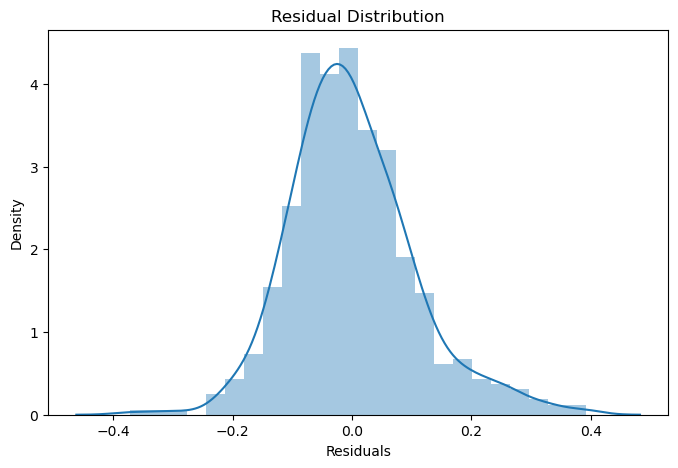

In [50]:
residuals = y_pred - y_test


#Histogram of residuals

plt.figure(figsize=(8,5))
sns.distplot(residuals)
plt.title('Residual Distribution')
plt.xlabel('Residuals')


#Chart shows normal distribution  of residuals

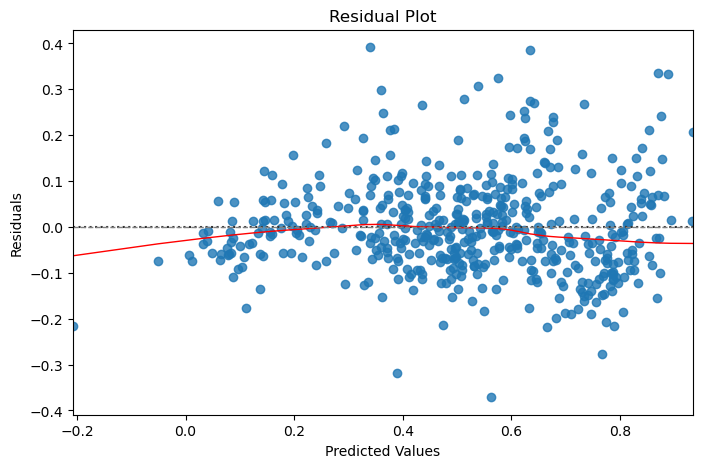

In [51]:
#residual vs predited values

plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.show()

#Chart shows constant variance for the residuals, the points are distributed almost equally on 
# upper and lower portions of the straightline,and its not showing any visible pattern 

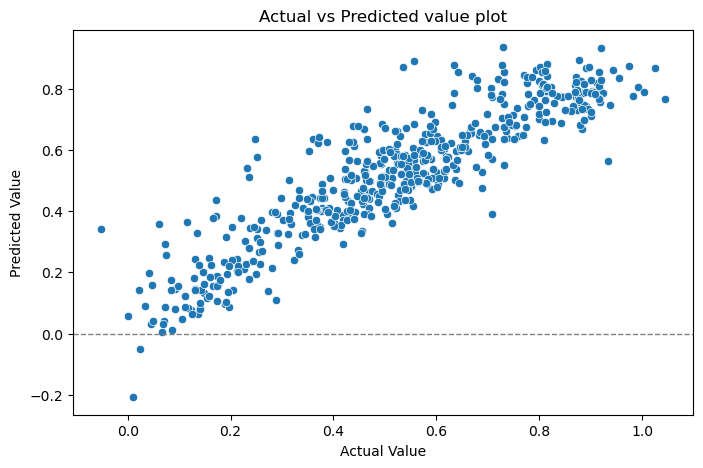

In [52]:
#Plot of actal and predicted to analyse the linearty
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted value plot')
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.show()

#Chart showing linear relationship, that indicate the linearity assuption is valid

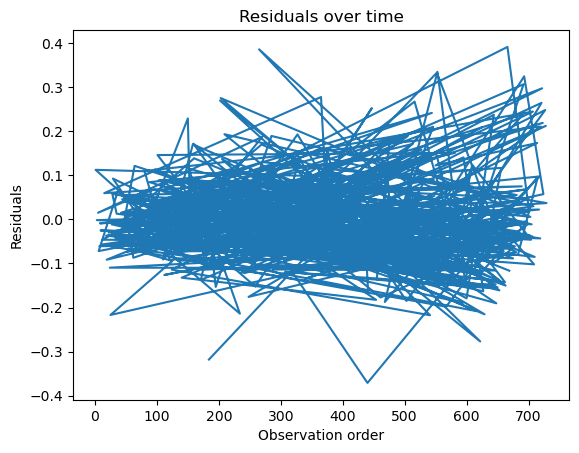

In [55]:
# plot to check independence of residual values


plt.plot(residuals)
plt.xlabel('Observation order')
plt.ylabel('Residuals')
plt.title('Residuals over time')
plt.show()

#No visible pattern in the chart 

In [53]:
#Finding the R2 value 

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

#the value .81 indicate that model explains 81% of the variability in the dependent variable

0.8106925997753701